IMPORT LIBRARIES

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.metrics import confusion_matrix

CHECKING IF FILES ACCESSIBLE

In [2]:
import os

# Define your folder paths
paths = [
    "C:\\Users\\Hello\\Desktop\\project folder",
    "C:\\Users\\Hello\\Desktop\\project folder\\eye_dataset 2",
    "C:\\Users\\Hello\\Desktop\\project folder\\eye_dataset 2\\train",
    "C:\\Users\\Hello\\Desktop\\project folder\\eye_dataset 2\\train\\open",
    "C:\\Users\\Hello\\Desktop\\project folder\\eye_dataset 2\\train\\closed",
    "C:\\Users\\Hello\\Desktop\\project folder\\eye_dataset 2\\test",
    "C:\\Users\\Hello\\Desktop\\project folder\\eye_dataset 2\\test\\open",
    "C:\\Users\\Hello\\Desktop\\project folder\\eye_dataset 2\\test\\closed"
]

# Check each path
for path in paths:
    if os.path.exists(path):
        print(f"✅ Found: {path}")
    else:
        print(f"❌ Not Found: {path}")

✅ Found: C:\Users\Hello\Desktop\project folder
✅ Found: C:\Users\Hello\Desktop\project folder\eye_dataset 2
✅ Found: C:\Users\Hello\Desktop\project folder\eye_dataset 2\train
✅ Found: C:\Users\Hello\Desktop\project folder\eye_dataset 2\train\open
✅ Found: C:\Users\Hello\Desktop\project folder\eye_dataset 2\train\closed
✅ Found: C:\Users\Hello\Desktop\project folder\eye_dataset 2\test
✅ Found: C:\Users\Hello\Desktop\project folder\eye_dataset 2\test\open
✅ Found: C:\Users\Hello\Desktop\project folder\eye_dataset 2\test\closed


LOAD AND PREPROCESS THE IMAGES

In [3]:
import cv2
import numpy as np

# Set base path
base_path = "C:\\Users\\Hello\\Desktop\\project folder\\eye_dataset 2"

# Function to load and process images
def load_images_from_folder(folder, label, image_size=(64, 64)):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        if img is not None:
            img = cv2.resize(img, image_size)
            images.append(img)
            labels.append(label)
    return images, labels

# Load all images with labels
train_open, train_open_labels = load_images_from_folder(base_path + "\\train\\open", 1)
train_closed, train_closed_labels = load_images_from_folder(base_path + "\\train\\closed", 0)
test_open, test_open_labels = load_images_from_folder(base_path + "\\test\\open", 1)
test_closed, test_closed_labels = load_images_from_folder(base_path + "\\test\\closed", 0)

# Combine data and labels
X_train = np.array(train_open + train_closed)
y_train = np.array(train_open_labels + train_closed_labels)

X_test = np.array(test_open + test_closed)
y_test = np.array(test_open_labels + test_closed_labels)

# Reshape to add channel dimension (grayscale)
X_train = X_train.reshape(-1, 64, 64, 1)
X_test = X_test.reshape(-1, 64, 64, 1)

print("✅ Training data shape:", X_train.shape)
print("✅ Testing data shape:", X_test.shape)


✅ Training data shape: (110, 64, 64, 1)
✅ Testing data shape: (110, 64, 64, 1)


Flatten the Image data for Scikit-learn

In [4]:
# Flatten the image arrays for Scikit-learn
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

print("✅ Flattened training shape:", X_train_flat.shape)
print("✅ Flattened testing shape:", X_test_flat.shape)


✅ Flattened training shape: (110, 4096)
✅ Flattened testing shape: (110, 4096)


Train a Simple Model using Scikit-learn (SVM Classifier)

In [5]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize and train the model
model = SVC(kernel='linear')  # You can try 'rbf' or 'poly' too
model.fit(X_train_flat, y_train)

# Make predictions
y_pred = model.predict(X_test_flat)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy: {accuracy * 100:.2f}%")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=['Closed', 'Open']))

print("\n🌀 Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

✅ Accuracy: 71.82%

📊 Classification Report:
              precision    recall  f1-score   support

      Closed       0.68      0.82      0.74        55
        Open       0.77      0.62      0.69        55

    accuracy                           0.72       110
   macro avg       0.73      0.72      0.72       110
weighted avg       0.73      0.72      0.72       110


🌀 Confusion Matrix:
[[45 10]
 [21 34]]


How data is performing on actual images

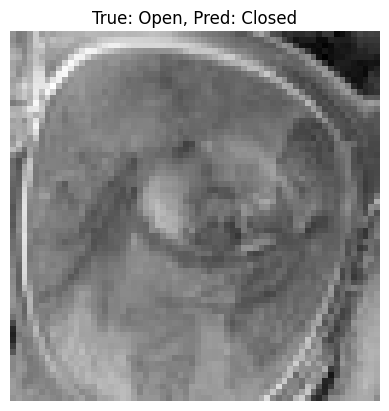

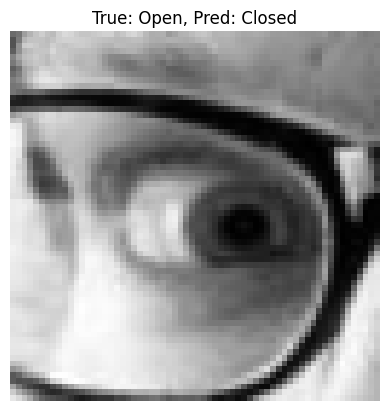

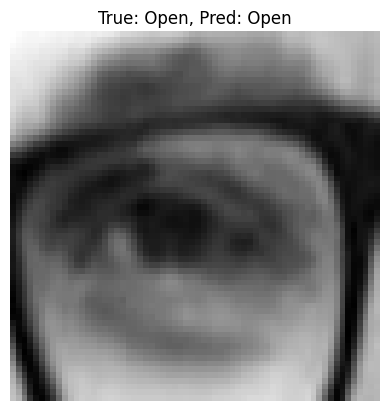

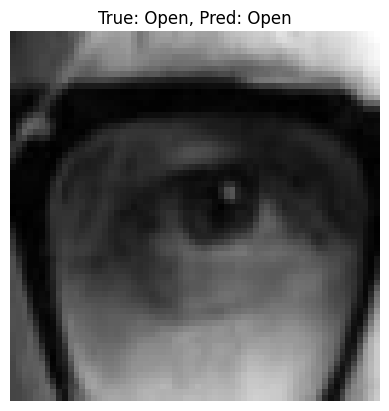

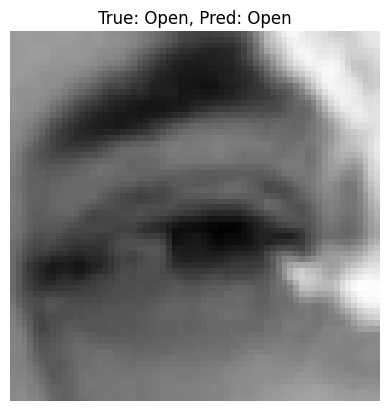

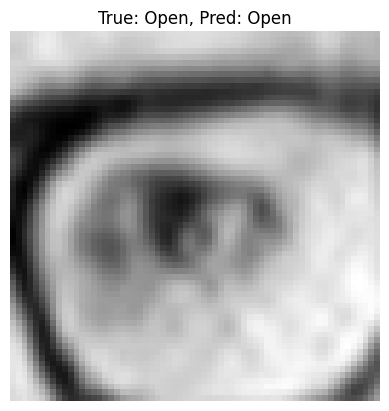

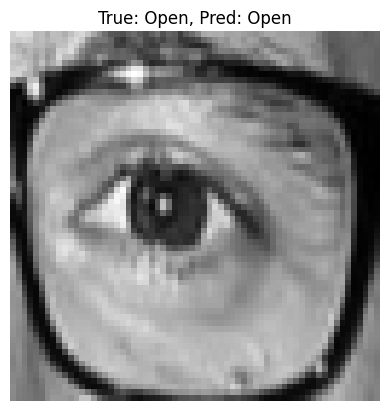

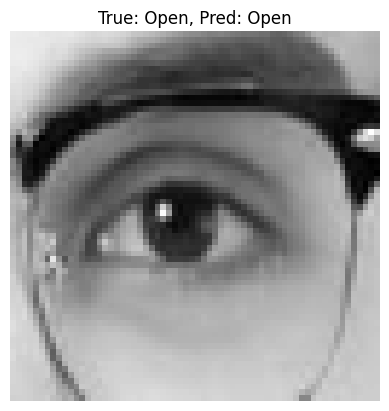

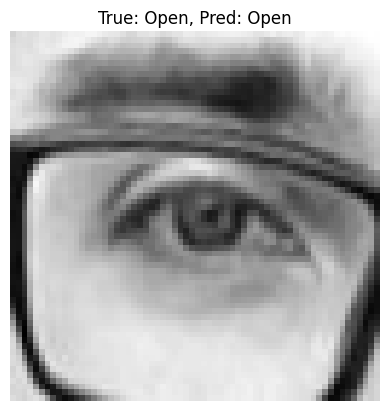

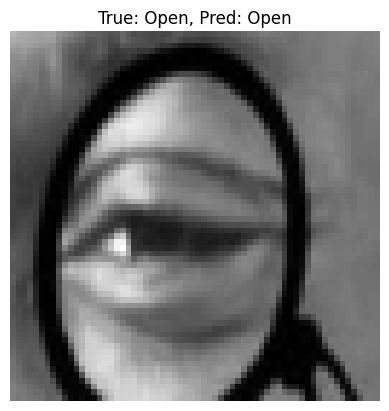

In [6]:
import matplotlib.pyplot as plt

# Show 10 predictions from the test set
for i in range(10):
    image = X_test[i].reshape(64, 64)
    true_label = 'Open' if y_test[i] == 1 else 'Closed'
    pred_label = 'Open' if y_pred[i] == 1 else 'Closed'
    
    plt.imshow(image, cmap='gray')
    plt.title(f"True: {true_label}, Pred: {pred_label}")
    plt.axis('off')
    plt.show()


Random forest 

In [8]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (110, 64, 64, 1)
y_train shape: (110,)


In [10]:
# Reshape (110, 64, 64, 1) → (110, 4096)
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))

print("Flattened X_train shape:", X_train_flat.shape)
print("Flattened X_test shape:", X_test_flat.shape)


Flattened X_train shape: (110, 4096)
Flattened X_test shape: (110, 4096)


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

rf_model = RandomForestClassifier()
rf_model.fit(X_train_flat, y_train)
rf_preds = rf_model.predict(X_test_flat)

print("✅ Random Forest Accuracy:", accuracy_score(y_test, rf_preds))
print("\n📝 Classification Report:\n", classification_report(y_test, rf_preds))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, rf_preds))


✅ Random Forest Accuracy: 0.7363636363636363

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.82      0.76        55
           1       0.78      0.65      0.71        55

    accuracy                           0.74       110
   macro avg       0.74      0.74      0.73       110
weighted avg       0.74      0.74      0.73       110


📊 Confusion Matrix:
 [[45 10]
 [19 36]]


K-Nearest Neighbors

In [13]:
# Flattening the image data for sklearn models
X_train_flat = X_train.reshape((X_train.shape[0], -1))
X_test_flat = X_test.reshape((X_test.shape[0], -1))


In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_flat, y_train)
knn_preds = knn.predict(X_test_flat)

print("✅ KNN Accuracy:", accuracy_score(y_test, knn_preds))
print("\n📝 Classification Report:\n", classification_report(y_test, knn_preds))
print("\n📊 Confusion Matrix:\n", confusion_matrix(y_test, knn_preds))


✅ KNN Accuracy: 0.7181818181818181

📝 Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.80      0.74        55
           1       0.76      0.64      0.69        55

    accuracy                           0.72       110
   macro avg       0.72      0.72      0.72       110
weighted avg       0.72      0.72      0.72       110


📊 Confusion Matrix:
 [[44 11]
 [20 35]]


Visualize Accuracy with a bar chart

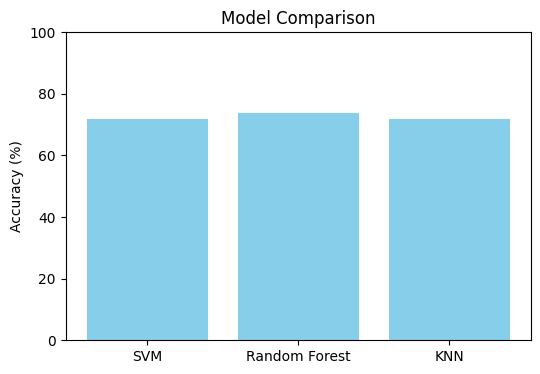

In [15]:
models = ['SVM', 'Random Forest', 'KNN']
accuracies = [
    accuracy_score(y_test, y_pred),       # SVM
    accuracy_score(y_test, rf_preds),     # Random Forest
    accuracy_score(y_test, knn_preds)     # KNN
]

plt.figure(figsize=(6, 4))
plt.bar(models, [a * 100 for a in accuracies], color='skyblue')
plt.ylabel('Accuracy (%)')
plt.title('Model Comparison')
plt.ylim(0, 100)
plt.show()
